# Regularización con LASSO y Leave-One-Out [FALTAN  CORRECCIONES]
[el que casi todos nos cagamos] 

Usando como target a 'Price' y como variables ['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Weight'], el objetivo de este ejercicio es elegir el conjunto de variables que mayor influencia tiene sobre el target (asumiendo un modelo lineal). Para esto van a utilizar regularizacion con LASSO y Leave-One-Out cross-validation. El objetivo es reproducir el equivalente de la Figura 6.12 y reportar la combinacion de variables que más influencia tiene. Pueden utilizar sklearn.linear_model.Lasso() y sklearn.model_selection.LeaveOneOut().

Text(0.5,0,'$\\lambda$')

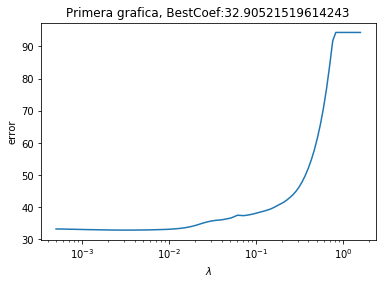

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut 

#Importo Datos
data = pd.read_csv('Cars93.csv')
X = data[['MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Passengers','Length','Wheelbase', 'Width', 'Turn.circle', 'Weight']].values
Y = data['Price'].values.reshape(-1,1)

#Inicializo LeaveOneOut y lo uso en el dataset de las variables
LOO = LeaveOneOut()
LOO.get_n_splits(X)

#Defino el lienzo para el plot (esto se elige de acuerdo a la figura 6.12 de "An Introduction to Statistical Learning With Applications in R")
N=100
L=np.logspace(-4,-0.5,N)*5.0 ##lambda

#lista de Coeficientes
co=[]
for i in L:
    LASSO = sklearn.linear_model.Lasso(i,normalize=True)   #Inicializo LASSO
    er=[]  #Inicializo la lista de errores MeanSquaredError
    for train_index, test_index in LOO.split(X):    #Separación en Train y Test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        LASSO.fit(X_train,Y_train)    #Hago el fit con LASSO y luego evaluo el error con MeanSquaredError
        er.append(mean_squared_error(LASSO.predict(X_test), Y_test))

    med=np.mean(np.asarray(er)) #Esto es una especie de error medio
    co.append(med)  

#Obtengo coeficientes de errores y me quedo con el que muestre un menor error. En la gráfica del linro
coef=np.asarray(co)
mp=coef[np.argmin(coef)]

plt.figure()
plt.semilogx(L,co)
plt.ylabel('error')
plt.title('Primera grafica, BestCoef:'+str(mp))
plt.xlabel(r'$\lambda$')
        
        
    

Text(0.5,0,'$\\lambda$')

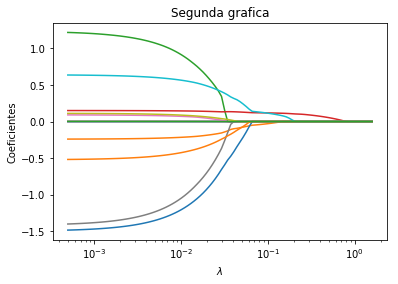

In [16]:
cop=[]
for i in L:
    LASSO = sklearn.linear_model.Lasso(i,normalize=True)
    for train_index, test_index in LOO.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        LASSO.fit(X_train,Y_train)
    cop.append(LASSO.coef_)
    
plt.figure()
plt.semilogx(L,cop)
plt.ylabel('Coeficientes')
plt.title('Segunda grafica')
plt.xlabel(r'$\lambda$')